С появлением [метода опорных векторов и ядерных методов]($SVM и ядерные методы в машинном обучении$) ([1963]($On a perceptron class$), [1992]($A Training Algorithm for Optimal Margin Classifiers$), [1995]($Support-Vector Networks$)) и развитием глубоких нейронных сетей ([1998]($Gradient-Based Learning Applied to Document Recognition$), [2006]($A Fast Learning Algorithm for Deep Belief Nets$), [2009]($Learning Deep Architectures for AI$)) исследователей стала интересовать взаимосвязь между этими классами алгоритмов.

В первой части данной работы предложено семейство ядер, которые имитируют работу полносвязной случайно инциализированной нейронной сети бесконечной ширины, имеющей один или несколько скрытых слоев. Во второй части работы авторы предлагают алгоритм классификации multilayer kernel machines.

Рассмотрим семейство функций активации вида $g_n(z) = \Theta(z)z^n$, где $\Theta(z)$ задается следующим образом:

$\Theta(z) = \begin{cases}
0 & z < 0\\
1 & z \geq 0
\end{cases}$

В частности, $g_0$ - пороговая функция активации, $g_1$ - функция активации ReLU. Рассмотрим нейронную сеть, состоящую из одного слоя с одной из таких функций активации: $\Phi(\mathbf{x}) = g_n(\mathbf{W}\mathbf{x})$. Веса сети будем считать случайно инициализированными нормальным распределением $\mathcal{N}(0, \sigma)$.

<img src="assets/kernelmethods.jpg" width="700" align="center">

Авторы предлагают использовать такую нейронную сеть в качестве функции $\Phi$, используемой для отображения в спрямляющее пространство в [ядерных методах]($SVM и ядерные методы в машинном обучении$). Такая функция соответствует некоему ядру $k$ по формуле, где точкой обозначено скалярное произведение:

$k(\mathbf{x}, \mathbf{y}) = \Phi(\mathbf{x}) \cdot \Phi(\mathbf{y})$

Выпишем в явном виде ядро $k$ для сети с $m$ нейронами. Каждая строка $w_i$ матрицы $W$ соответствует входным весам одного нейрона:

$k_{n,m}(\mathbf{x}, \mathbf{y}) = \sum\limits_{i=1}^m g_n(\mathbf{w_i} \cdot \mathbf{x})\ g_n(\mathbf{w_i} \cdot \mathbf{y}) = \sum\limits_{i=1}^m \Theta(\mathbf{w_i} \cdot \mathbf{x})\ \Theta(\mathbf{w_i} \cdot \mathbf{y})\ (\mathbf{w_i} \cdot \mathbf{x})^n\ (\mathbf{w_i} \cdot \mathbf{y})^n$

В пределе при количестве нейронов $m \to \infty$ и дисперсии случайной инициализации $\sigma \to 0$ получим интегрирование по вероятностному распределению значений весов нейрона $\mathbf{w}$, которое является многомерным нормальным распределением:

$k_n(\mathbf{x}, \mathbf{y}) = 2 \displaystyle \int \mathbf{dw}\ \cfrac{\exp(-{\|w\|^2}/2)}{(2 \pi)^{d/2}}\ \Theta(\mathbf{w} \cdot \mathbf{x})\ \Theta(\mathbf{w} \cdot \mathbf{y})\ (\mathbf{w} \cdot \mathbf{x})^n\ (\mathbf{w} \cdot \mathbf{y})^n$

Выражение $k_n(\mathbf{x}, \mathbf{y})$ можно упростить и выразить через нормы векторов $\mathbf{x}$ и $\mathbf{y}$ и угол $\theta_{x, y}$ между ними:

$k_n(\mathbf{x}, \mathbf{y}) = \cfrac{1}{\pi} \|x\|^n\ \|y\|^n\ J_n(\theta_{x, y})$

Функция $J_n$ в общем случае имеет достаточно сложный вид, но для $n \in \{0, 1, 2\}$ выражается таким образом:

- $J_0(\theta) = \pi - \theta$
- $J_1(\theta) = \sin\theta + (\pi - \theta) \cos\theta$
- $J_2(\theta) = 3\sin\theta\cos\theta + (\pi - \theta) (1 + 2\cos^2\theta)$

Ядро $k_n(\mathbf{x}, \mathbf{y})$ авторы называют arc-cosine kernel. При пороговой функции активации $g_0$ ядро имеет следующий вид:

$k_0(\mathbf{x}, \mathbf{y}) = (1 - \frac{1}{\pi}\theta_{x, y}) = (1 - \frac{1}{\pi} \arccos \frac{\mathbf{x} \cdot \mathbf{y}}{\|x\| \|y\|})$

Графики функций $J_n$ выглядят следующим образом (слева - в абсолютном значении, справа - после приведения к одному масштабу):

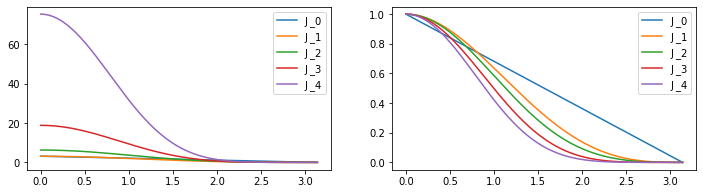

In [15]:
import numpy as np, sympy as sym, matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

theta = sym.Symbol('theta')
def J(n): #general equation for J_n
    fn = (-1)**n
    fn *= (sym.sin(theta))**(n+1)
    fn *= sym.diff((sym.pi - theta) / sym.sin(theta), theta, n)
    return sym.together(fn)

plt, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
for n in range(5):
    Jn = lambdify(theta, J(n), 'numpy')
    X = np.linspace(0, np.pi, 500)
    ax1.plot(X, Jn(X), label=f'J _{n}')
    ax2.plot(X, Jn(X) / Jn(0), label=f'J _{n}')

ax1.legend(), ax2.legend();

Для многослойных нейронных сетей ядро выражается следующим образом:

$k^{(l)}(\mathbf{x}, \mathbf{y}) = \underbrace{\Phi(\Phi(\dots \Phi}_{l\ \text{times}}(\mathbf{x}))) \cdot \underbrace{\Phi(\Phi(\dots \Phi}_{l\ \text{times}}(\mathbf{y})))$

Авторы выводят рекуррентную формулу (которая здесь не приводится), которая позволяет вычислять $k^{(l)}$ для любой глубины сети $l$ и степени функции активации $n$.

### Нейронные сети бесконечной ширины

Полученное семейство ядер имитирует вычисления в многослойной нейронной сети (без bias'ов) бесконечной ширины со случайно инициализированными весами. Обучение SVM с такими ядрами можно представить как обучение нейронной сети, в которой обучается только последний слой, а работа всех предыдущих (замороженных) слоев обозначается функцией $\Phi$.

С одной стороны, основная черта нейронных сетей именно в том, что они обучаются, тогда как в данном случае рассматривается необучаемая случайно инициализированная сеть. Но с другой стороны, даже случайно инициализированные нейронные сети большой ширины, в которых обучается только последний слой, способны решать многие задачи, что показано в следующих работах:

- [Random deep neural networks are biased towards simple functions]($Random deep neural networks are biased towards simple functions$) (2018)
- [Deep Randomized Neural Networks]($Deep Randomized Neural Networks$) (2020)

Нейронные сети бесконечной ширины также исследуются в следующих работах:

- [Neural Tangent Kernel: Convergence and Generalization in Neural Networks]($Neural Tangent Kernel: Convergence and Generalization in Neural Networks$) (2018)
- [On Exact Computation with an Infinitely Wide Neural Net]($On Exact Computation with an Infinitely Wide Neural Net$) (2019)

Есть еще несколько работ, посвященных исследованию нейронных сетей большой (но конечной) ширины. Такие сети обладают высокой выразительной способностью. Традиционно считается, что высокая выразительная способность моделей приводит к переобучению, однако при обучении нейронных сетей такого эффекта часто не наблюдается.

- [High-dimensional dynamics of generalization error in neural networks]($High-dimensional dynamics of generalization error in neural networks$) (2017)
- [Reconciling modern machine learning practice and the bias-variance trade-off]($Reconciling modern machine learning practice and the bias-variance trade-off$) (2018)
- [Scaling description of generalization with number of parameters in deep learning]($Scaling description of generalization with number of parameters in deep learning$) (2019)